# Project for BSG

## EDA

### Briefing

<u>**Context**</u>: The client is Power Co, a major gas and electricity utility, and they experience a huge customer churn. In other words, clients stop having business with the company due to power-liberalization of the energy market in Europe, which costs them large chunks of revenues. 

<u>**Data Science Task**</u>: The data science task is to test our client’s hypothesis that the problem is driven by price sensitivity and that a 20% discount will be effective.

<u>**Data requirements**</u>: The data must contain customer data, especially the price they are paying for the services. Also it will be great if the data has some sort of a binary outcome, whether people stayed with our client or not. Other info is not particularly necessary but will definitely be beneficial.



Now, we have the data, let's have a look at it

In [1]:
# importing clients' data
import pandas as pd

client_data = pd.read_csv("data/client_data.csv")
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [2]:
# importing price data
price_data = pd.read_csv("data/price_data.csv")
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


Before doing anything else, we'll look into basic statistics of the data and other parameteres like data types, missing values, etc.

In [3]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [4]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [6]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


No null data and no anomalies can be detected based on the basic information on the dataset.

Except, looking at the quartiles of the client data, we can see that the data is highly skewed, meaning that it suddenly changes

We'll look into the distributions of data. For floats and ints kde distplots will be used, for relevant objects will be visualized via regular bar charts, I guess

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

float_int_values = [
    "forecast_cons_12m",
    "forecast_discount_energy",
    "forecast_meter_rent_12m",
    "forecast_price_energy_off_peak",
    "forecast_price_energy_peak",
    "forecast_price_pow_off_peak",
    "imp_cons",
    "margin_gross_pow_ele",
    "margin_net_pow_ele",
    "net_margin",
    "pow_max",
    "cons_12m",
    "cons_gas_12m",
    "cons_last_month",
    "forecast_cons_year",
    "nb_prod_act",
    "num_years_antig",
    "churn"
]

def plot_dist_kde(column_name, dataset):
    sns.displot(data=dataset, x=column_name, kind="kde")
    plt.title(f"The distribution of {column_name} feature")
    plt.show()

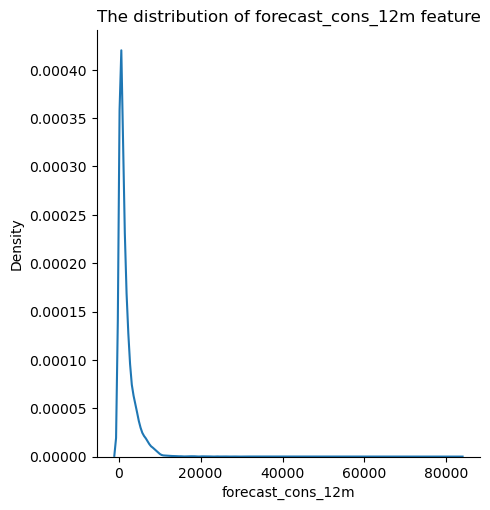

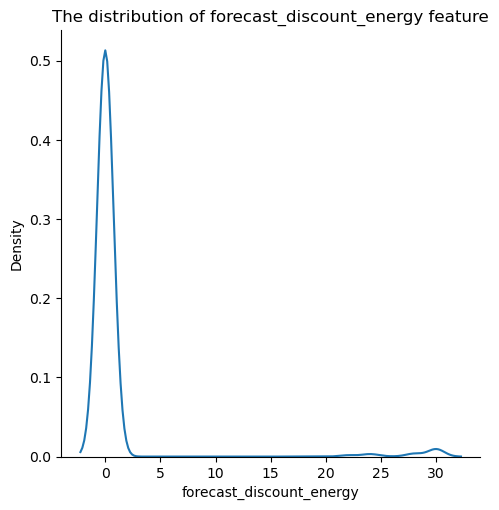

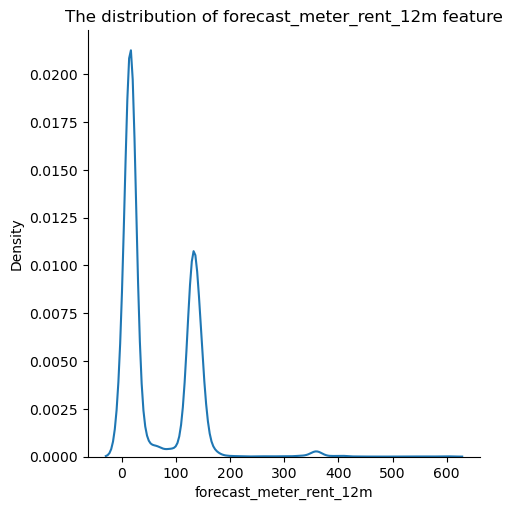

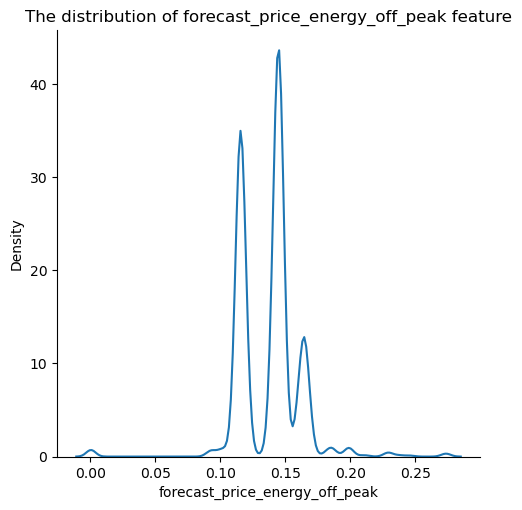

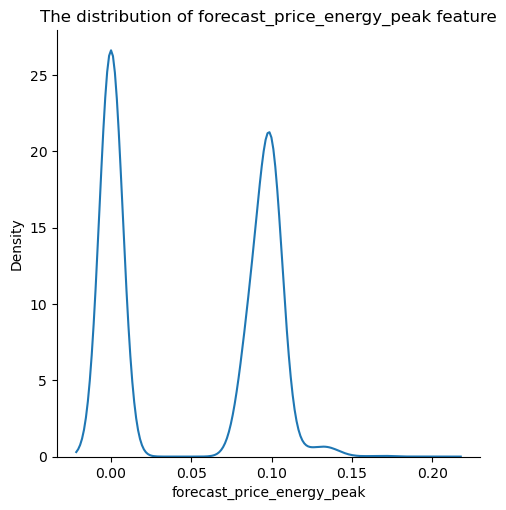

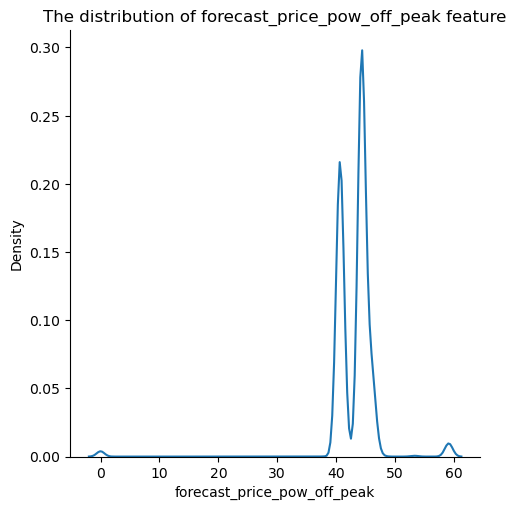

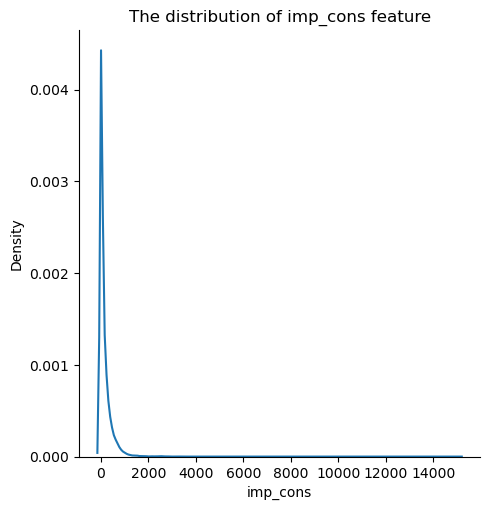

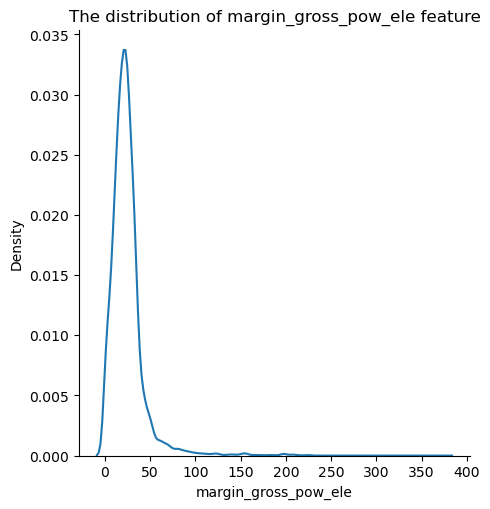

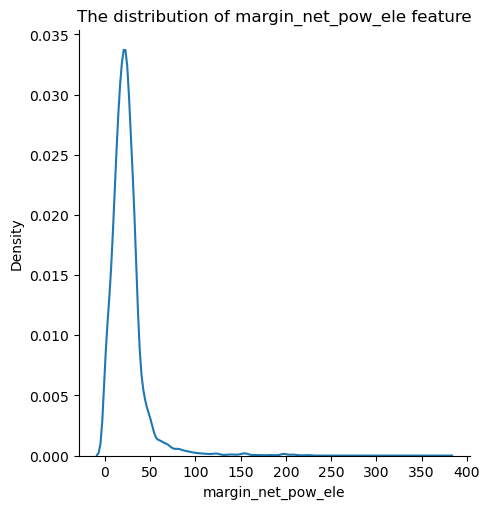

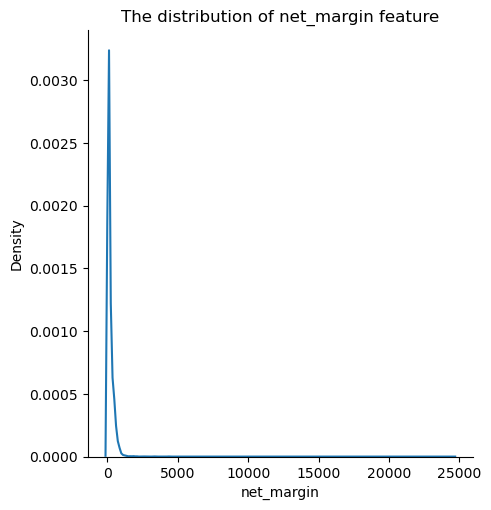

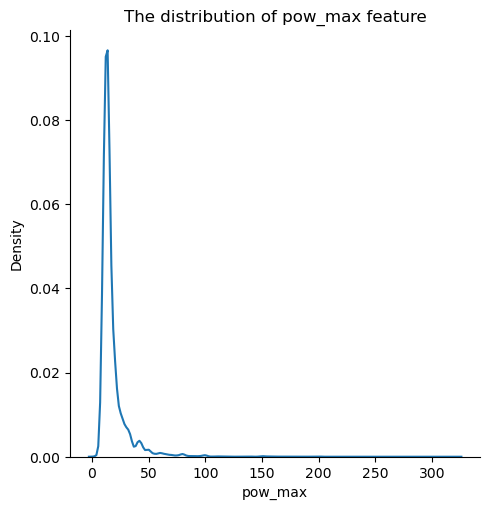

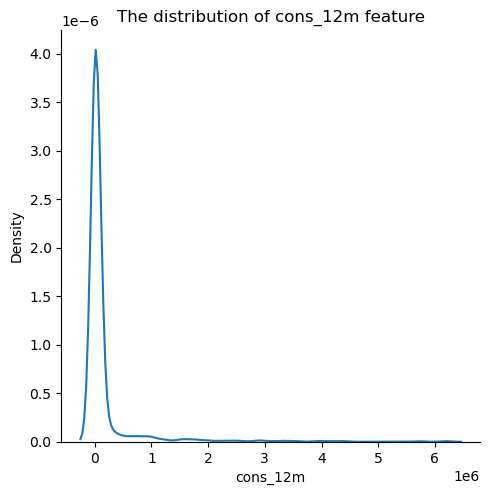

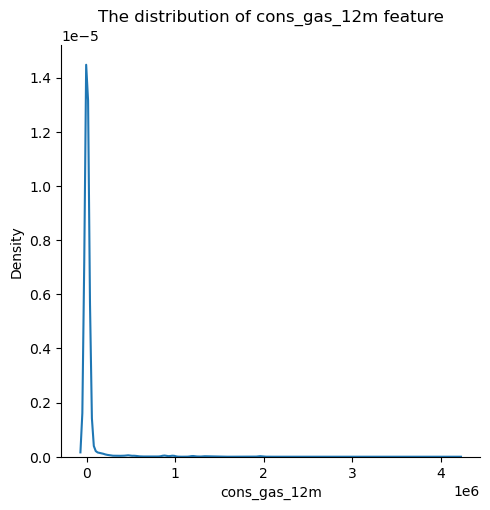

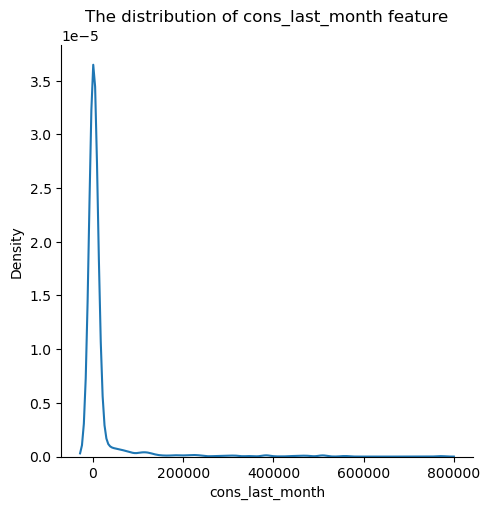

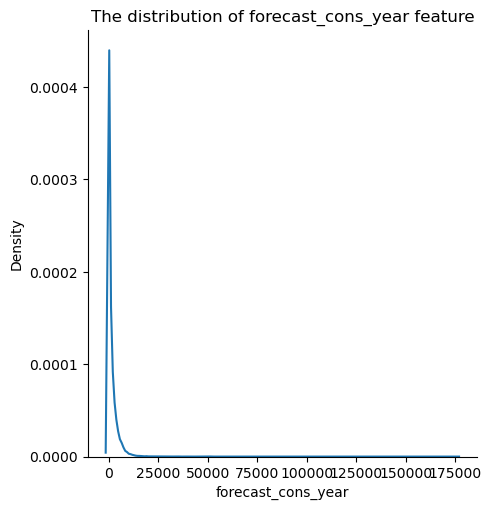

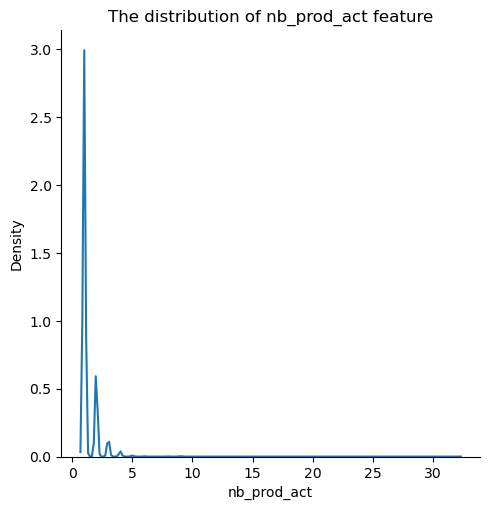

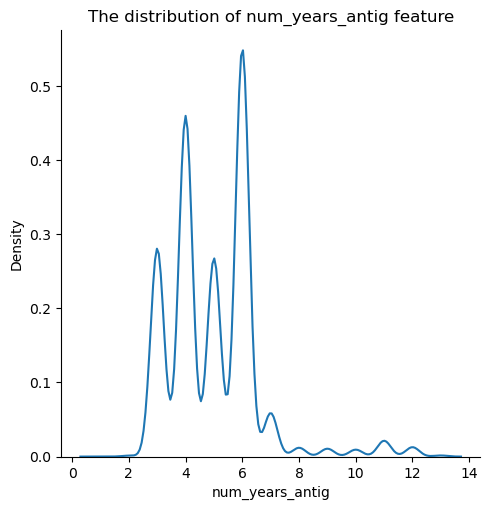

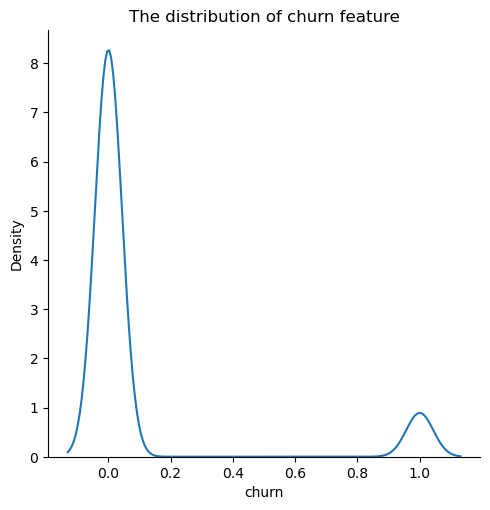

In [8]:
for column in float_int_values:
    plot_dist_kde(column, client_data)

Many things in here have normal distribution that separates into different types with various number of peaks. 

Churn, however, has a Bernoulli distribution, which means it's binary and according to the data description, is a our target

Also, some features in clients data are highly assymetrical skewed to the far left mostly and sometimes to the far right, which impacts the quality of data. Should be cleaned afterwards

Besides, fluctuations in the tails indicate the presence of outliers. They also should be dealt with

The only object that interests us in the client dataset id `has_gas` feauture. Let's visualize it

In [9]:
has_gas_data = client_data.groupby("has_gas")["id"].count().reset_index()
has_gas_data

,has_gas,id
0,f,11955
1,t,2651


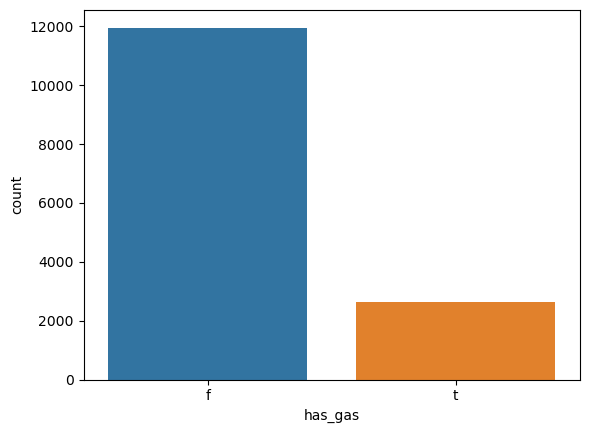

In [10]:
sns.barplot(data=has_gas_data, x="has_gas", y="id")
plt.ylabel("count")
plt.show()

Most people are not gas clients

Let's look at the distribution of price features

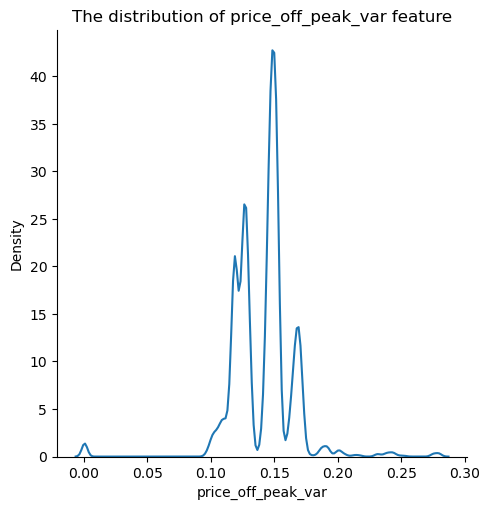

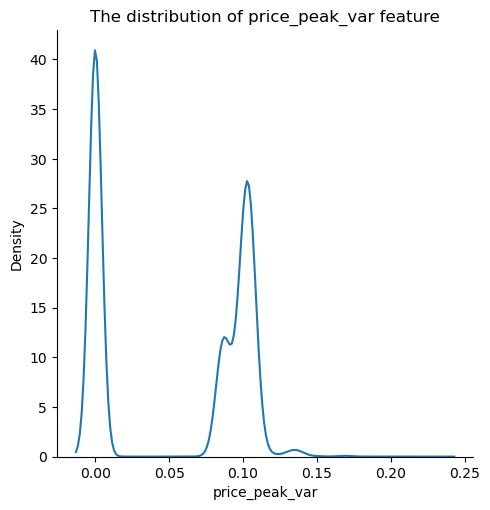

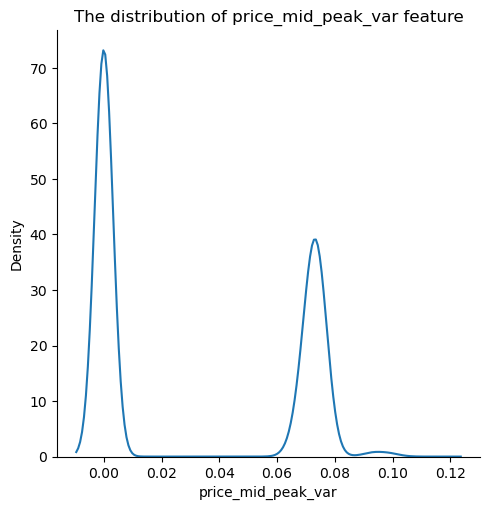

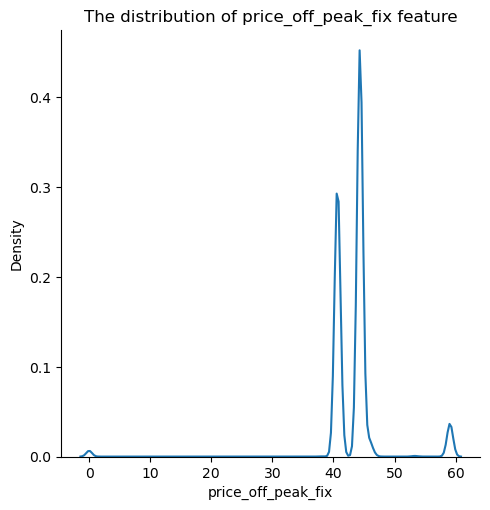

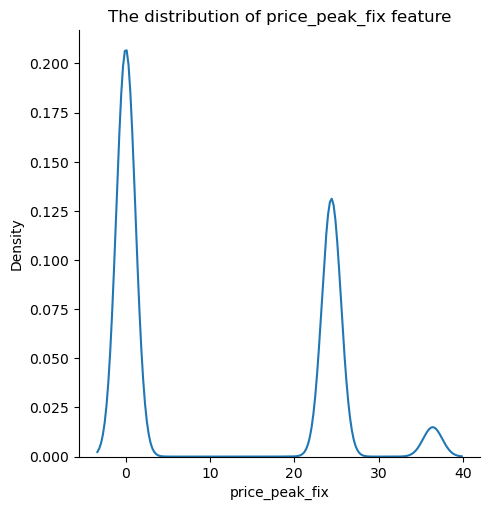

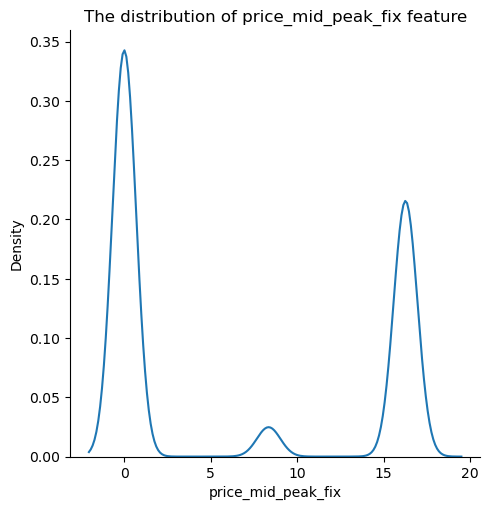

In [11]:
price_features = [
    "price_off_peak_var",
    "price_peak_var",
    "price_mid_peak_var",
    "price_off_peak_fix",
    "price_peak_fix",
    "price_mid_peak_fix"
]

for column in price_features:
    plot_dist_kde(column, price_data)

Again, normal distribution with various peaks, 2 is the most common number of peaks

Now, it's time for explorative data analysis in terms of churned and retained clients

First and foremost, the `churn` parameter to see the percentage of churned clients

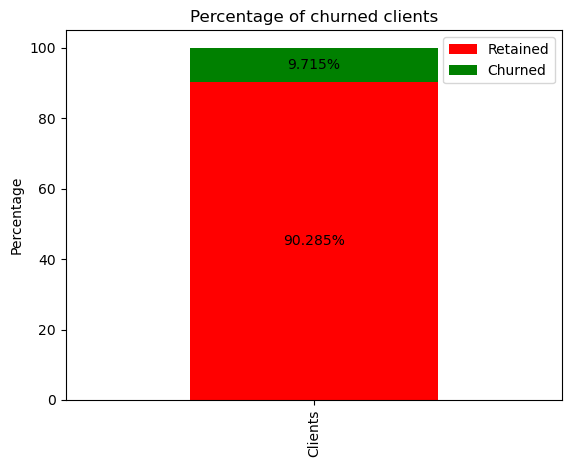

In [12]:
churn_data = pd.DataFrame(
    {"Retained":len(client_data[client_data["churn"]==0])/len(client_data)*100,
     "Churned":len(client_data[client_data["churn"]==1])/len(client_data)*100},
     index=["Clients"]
)
pl = churn_data.plot(kind="bar", stacked=True, color=["red", "green"])
plt.ylabel("Percentage")
for patch in pl.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy() 
    pl.text(x+width/2, 
            y+height/2, 
            f"{height:.3f}%", 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title("Percentage of churned clients")
plt.show()

A little less than 10% of clients churn which is not too bad but could be better of course

Next come the `has_gas` feature. The visualization below will determine what percentage of clinets churn in each category

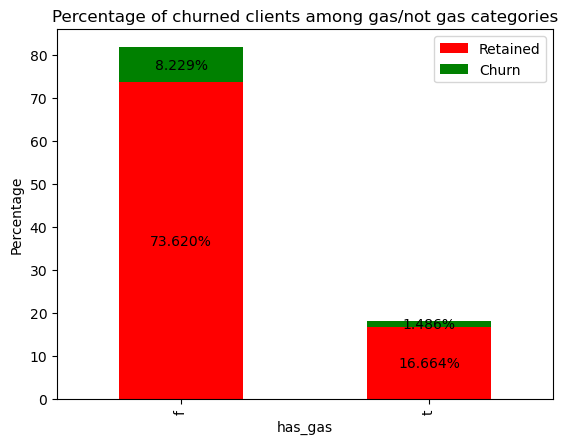

In [13]:
gas_data = client_data.groupby(["has_gas", "churn"])["id"].count() / len(client_data) * 100
gas_data = gas_data.unstack("churn")
gas_data.columns = ["Retained", "Churn"]
pl = gas_data.plot(kind="bar", stacked=True, color=["red", "green"])
plt.ylabel("Percentage")
for patch in pl.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy() 
    pl.text(x+width/2, 
            y+height/2, 
            f"{height:.3f}%", 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title("Percentage of churned clients among gas/not gas categories")
plt.show()

Gas clients tend to churn less, than regular ones. Moving on to sales_channels

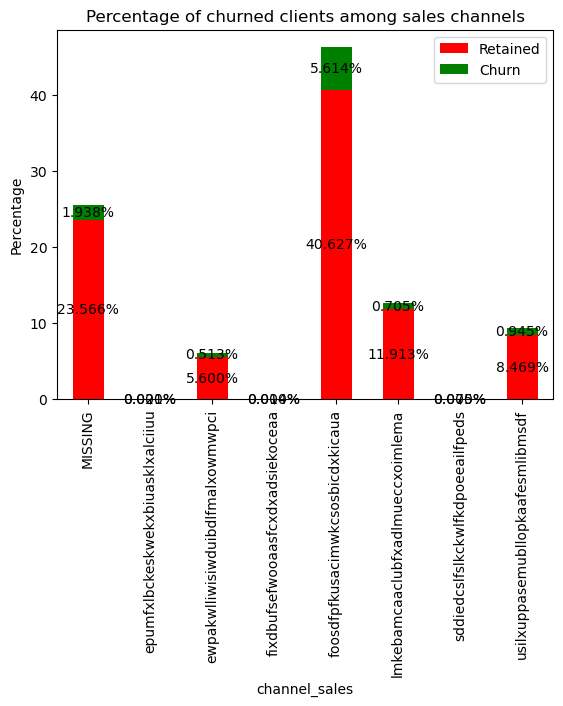

In [14]:
sales_data = client_data.groupby(["channel_sales", "churn"])["id"].count() / len(client_data) * 100
sales_data = sales_data.unstack("churn")
sales_data.columns = ["Retained", "Churn"]
pl = sales_data.plot(kind="bar", stacked=True, color=["red", "green"])
plt.ylabel("Percentage")
for patch in pl.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy() 
    pl.text(x+width/2, 
            y+height/2, 
            f"{height:.3f}%", 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title("Percentage of churned clients among sales channels")
plt.show()

Alright, several things to unpack here. Firstly, sales channel "foosdfpfkusacimwkcsosbicdxkicaua" have the most number of churned clients, so maybe they should do a better job. Secondly, only 5 channels have significant amount of data. The rest have less than one percent, so might be deleted later or some additional data needed

Let's look at the clients in tems of antiquity

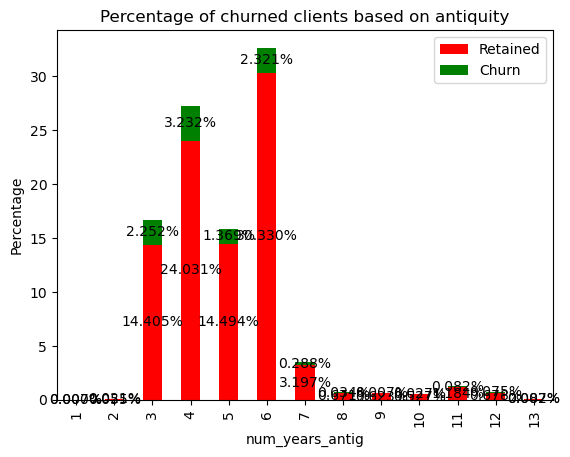

In [15]:
antique_data = client_data.groupby(["num_years_antig", "churn"])["id"].count() / len(client_data) * 100
antique_data = antique_data.unstack("churn")
antique_data.columns = ["Retained", "Churn"]
pl = antique_data.plot(kind="bar", stacked=True, color=["red", "green"])
plt.ylabel("Percentage")
for patch in pl.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy() 
    pl.text(x+width/2, 
            y+height/2, 
            f"{height:.3f}%", 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title("Percentage of churned clients based on antiquity")
plt.show()

Clients from 3-6 years of antiquity tend to churn more, than the rest. Maybe that's valid, maybe not because of lack of data

To see if the client's hypothesis is correct, we'll merge price and client data and visualize a correlation matrix

In [16]:
hyp_data = pd.merge(left=client_data[["id", "churn"]], right=price_data, how="inner", on="id")
hyp_data

,id,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


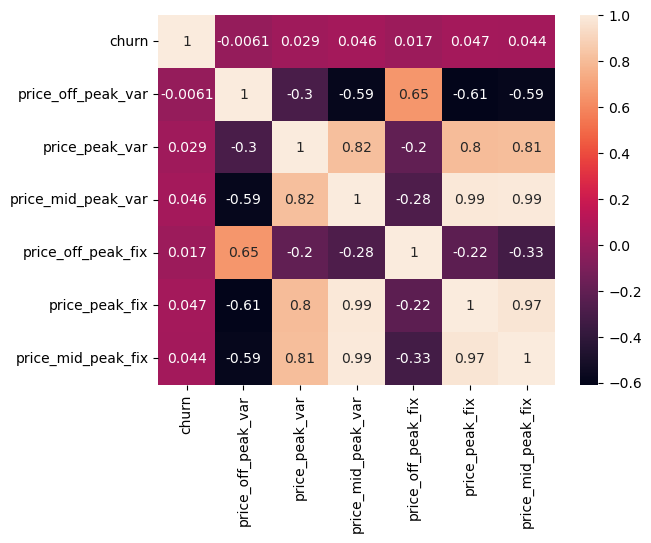

In [17]:
sns.heatmap(data=hyp_data.corr(numeric_only=True), annot=True)
plt.show()

The coefficients are not convincing - they're less than 0.1

That is very sad. Maybe if we use a diffrently engineered price measure, we'll get something better.

Suppose we have a mean price for every category - that will be the price sensitivity. Presence of date columns indicate that we could separate them into several periods. Let's examine the time range

In [18]:
# converting to datetime
price_data['price_date'] = pd.to_datetime(price_data['price_date'], format='%Y-%m-%d')

In [19]:
# the years we have the data for
set(price_data['price_date'].dt.year)

{2015}

We have data for the whole year of 2015. But what about months?

In [20]:
set(price_data['price_date'].dt.month)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

No gaps in months - that's good. We'll separate the mean price for the whole year, 6 months, and 3 months

In [21]:
# for the whole year
year_mean = price_data.groupby("id").mean().reset_index()
year_mean

/tmp/ipykernel_17654/3258439421.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_mean = price_data.groupby("id").mean().reset_index()


,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [22]:
# rename columns
year_mean = year_mean.add_prefix("year_")
year_mean = year_mean.rename(columns={"year_id":"id"})
year_mean

,id,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [23]:
# for 6 months

import numpy as np

price_data["year_half"] = np.where(price_data["price_date"].dt.month > 6, 2, 1)
half_year_data = price_data.groupby(["year_half", "id"]).mean().reset_index()
half_year_data = half_year_data.drop(columns=["year_half"]).add_prefix("half_year_").rename(columns={"half_year_id":"id"})
half_year_data

/tmp/ipykernel_17654/411262967.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  half_year_data = price_data.groupby(["year_half", "id"]).mean().reset_index()


,id,half_year_price_off_peak_var,half_year_price_peak_var,half_year_price_mid_peak_var,half_year_price_off_peak_fix,half_year_price_peak_fix,half_year_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833
1,0004351ebdd665e6ee664792efc4fd13,0.148166,0.000000,0.000000,44.326191,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.161093,0.000000,0.000000,44.694710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.123086,0.100505,0.068646,40.565970,24.339580,16.226388
4,00114d74e963e47177db89bc70108537,0.149668,0.000000,0.000000,44.266931,0.000000,0.000000
...,...,...,...,...,...,...,...
32187,ffef185810e44254c3a4c6395e6b4d8a,0.113848,0.095499,0.068838,40.728885,24.437330,16.291555
32188,fffac626da707b1b5ab11e8431a4d0a2,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000
32189,fffc0cacd305dd51f316424bbb08d1bd,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555
32190,fffe4f5646aa39c7f97f95ae2679ce64,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969


In [24]:
# for 3 months

price_data["quarter"] = np.where(price_data["price_date"].dt.month <= 3, 1, 
                                 np.where(price_data["price_date"].dt.month <= 6, 2, 
                                          np.where(price_data["price_date"].dt.month <= 9, 3, 4)))
quarter_data = price_data.groupby(["quarter", "id"]).mean().reset_index()
quarter_data = quarter_data.drop(columns=["quarter"]).add_prefix("quarter_").rename(columns={"quarter_id":"id"})
quarter_data

/tmp/ipykernel_17654/3297237000.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarter_data = price_data.groupby(["quarter", "id"]).mean().reset_index()


,id,quarter_price_off_peak_var,quarter_price_peak_var,quarter_price_mid_peak_var,quarter_price_off_peak_fix,quarter_price_peak_fix,quarter_price_mid_peak_fix,quarter_year_half
0,0002203ffbb812588b632b9e628cc38d,0.126754,0.104597,0.071412,40.620275,24.372164,16.248111,1.0
1,0004351ebdd665e6ee664792efc4fd13,0.148047,0.000000,0.000000,44.266931,0.000000,0.000000,1.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.151574,0.000000,0.000000,44.444710,0.000000,0.000000,1.0
3,0010ee3855fdea87602a5b7aba8e42de,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,1.0
4,00114d74e963e47177db89bc70108537,0.149434,0.000000,0.000000,44.266931,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
64369,ffef185810e44254c3a4c6395e6b4d8a,0.112488,0.094804,0.068829,40.728885,24.437330,16.291555,2.0
64370,fffac626da707b1b5ab11e8431a4d0a2,0.145047,0.000000,0.000000,44.444710,0.000000,0.000000,2.0
64371,fffc0cacd305dd51f316424bbb08d1bd,0.151399,0.126871,0.091394,41.228885,24.937330,16.791555,2.0
64372,fffe4f5646aa39c7f97f95ae2679ce64,0.118175,0.100491,0.074516,40.728885,24.437330,16.291555,2.0


In [25]:
# time to merge
half_and_quater = pd.merge(left=half_year_data, right=quarter_data, on="id", how="inner")
half_and_quater

,id,half_year_price_off_peak_var,half_year_price_peak_var,half_year_price_mid_peak_var,half_year_price_off_peak_fix,half_year_price_peak_fix,half_year_price_mid_peak_fix,quarter_price_off_peak_var,quarter_price_peak_var,quarter_price_mid_peak_var,quarter_price_off_peak_fix,quarter_price_peak_fix,quarter_price_mid_peak_fix,quarter_year_half
0,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,0.126754,0.104597,0.071412,40.620275,24.372164,16.248111,1.0
1,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,1.0
2,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,0.122626,0.103063,0.073737,40.728885,24.437330,16.291555,2.0
3,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,2.0
4,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0.126754,0.104597,0.071412,40.620275,24.372164,16.248111,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128743,ffff7fa066f1fb305ae285bb03bf325a,0.129444,0.106863,0.075004,40.565970,24.339580,16.226388,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555,2.0
128744,ffff7fa066f1fb305ae285bb03bf325a,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389,1.0
128745,ffff7fa066f1fb305ae285bb03bf325a,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,0.129444,0.106863,0.075004,40.565971,24.339580,16.226387,1.0
128746,ffff7fa066f1fb305ae285bb03bf325a,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,0.122636,0.103622,0.076275,40.728885,24.437330,16.291555,2.0


In [26]:
# another merge
whole_mean = pd.merge(left=half_and_quater, right=year_mean, on="id", how="inner")
whole_mean

,id,half_year_price_off_peak_var,half_year_price_peak_var,half_year_price_mid_peak_var,half_year_price_off_peak_fix,half_year_price_peak_fix,half_year_price_mid_peak_fix,quarter_price_off_peak_var,quarter_price_peak_var,quarter_price_mid_peak_var,quarter_price_off_peak_fix,quarter_price_peak_fix,quarter_price_mid_peak_fix,quarter_year_half,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,0.126754,0.104597,0.071412,40.620275,24.372164,16.248111,1.0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,1.0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
2,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,0.122626,0.103063,0.073737,40.728885,24.437330,16.291555,2.0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
3,0002203ffbb812588b632b9e628cc38d,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,2.0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
4,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0.126754,0.104597,0.071412,40.620275,24.372164,16.248111,1.0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128743,ffff7fa066f1fb305ae285bb03bf325a,0.129444,0.106863,0.075004,40.565970,24.339580,16.226388,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555,2.0,0.125360,0.104895,0.075635,40.647427,24.388455,16.258971
128744,ffff7fa066f1fb305ae285bb03bf325a,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389,1.0,0.125360,0.104895,0.075635,40.647427,24.388455,16.258971
128745,ffff7fa066f1fb305ae285bb03bf325a,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,0.129444,0.106863,0.075004,40.565971,24.339580,16.226387,1.0,0.125360,0.104895,0.075635,40.647427,24.388455,16.258971
128746,ffff7fa066f1fb305ae285bb03bf325a,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,0.122636,0.103622,0.076275,40.728885,24.437330,16.291555,2.0,0.125360,0.104895,0.075635,40.647427,24.388455,16.258971


In [27]:
# minor corrections
whole_mean = whole_mean.drop(columns=["quarter_year_half"])
whole_mean.columns

Index(['id', 'half_year_price_off_peak_var', 'half_year_price_peak_var',
       'half_year_price_mid_peak_var', 'half_year_price_off_peak_fix',
       'half_year_price_peak_fix', 'half_year_price_mid_peak_fix',
       'quarter_price_off_peak_var', 'quarter_price_peak_var',
       'quarter_price_mid_peak_var', 'quarter_price_off_peak_fix',
       'quarter_price_peak_fix', 'quarter_price_mid_peak_fix',
       'year_price_off_peak_var', 'year_price_peak_var',
       'year_price_mid_peak_var', 'year_price_off_peak_fix',
       'year_price_peak_fix', 'year_price_mid_peak_fix'],
      dtype='object')

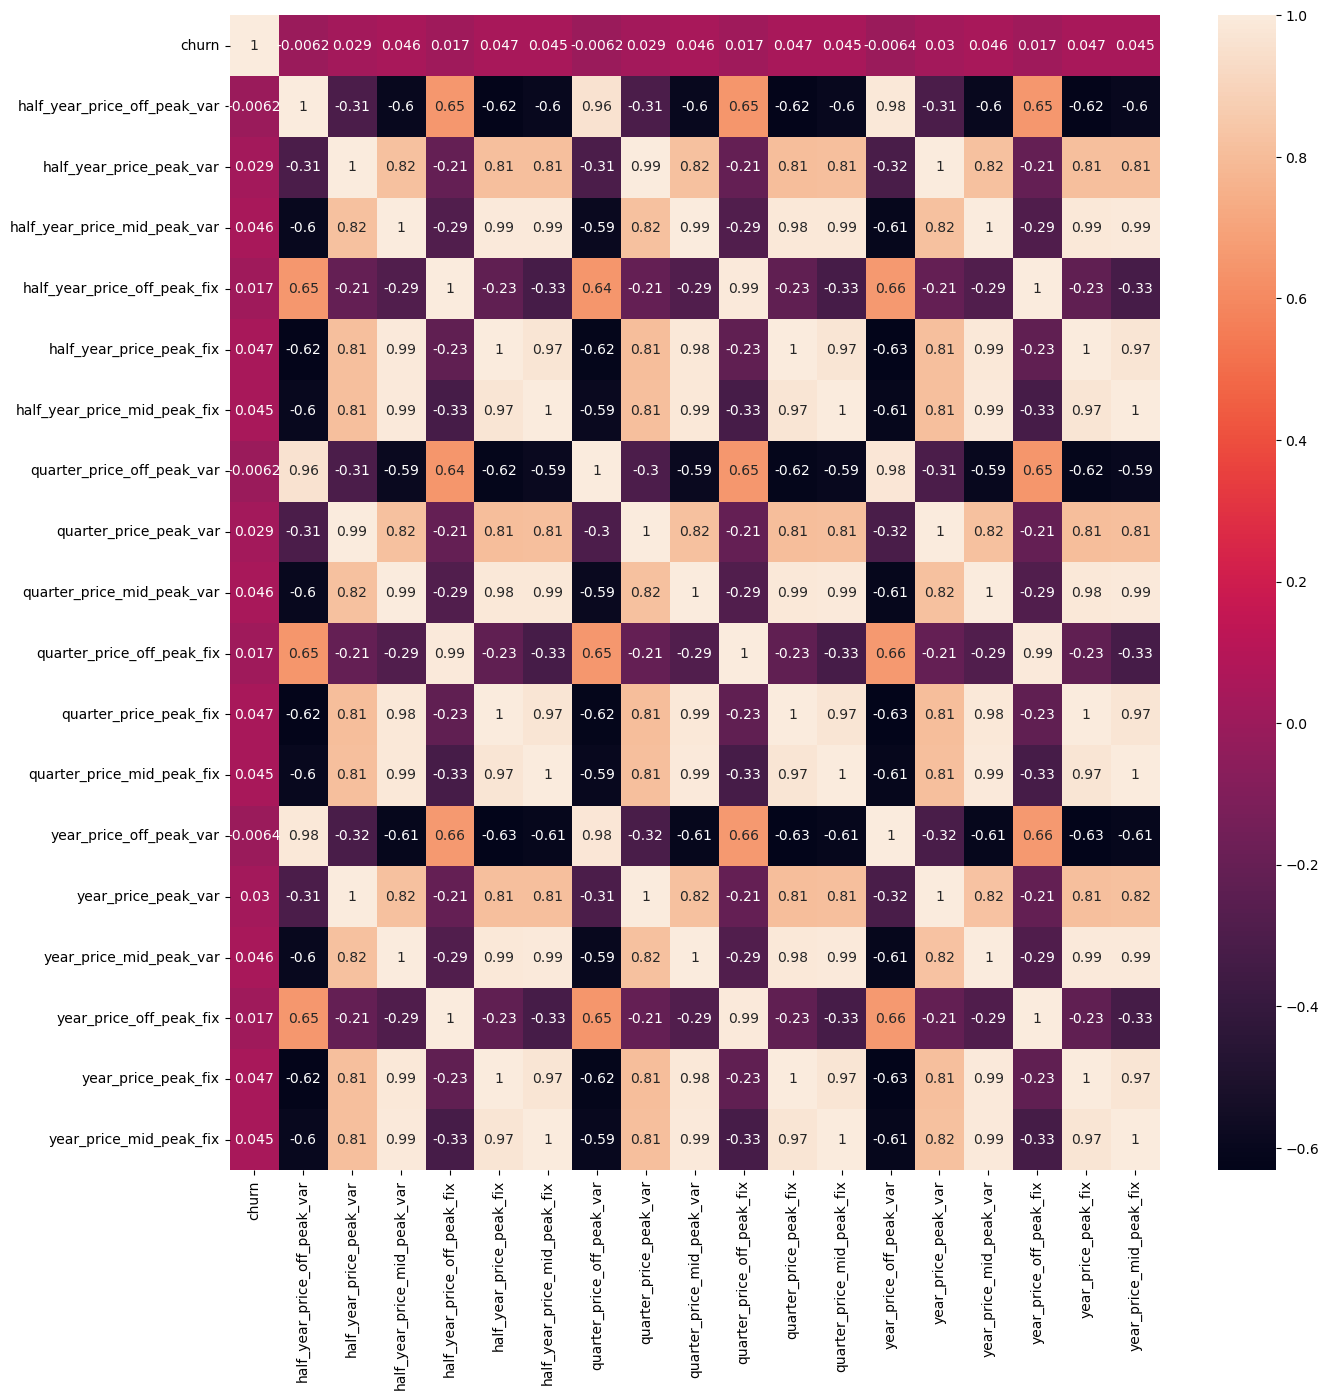

In [28]:
hyp_data2 = pd.merge(left=client_data[["id", "churn"]], right=whole_mean, on="id", how="inner")
plt.figure(figsize=(15, 15))
sns.heatmap(data=hyp_data2.corr(numeric_only=True), annot=True)
plt.show()

Still quite bad. Price should be reengineered

### Summary

- 10% of clients churn
- there is a lot of skewing and there are a lot of outliers in the dataset, should be cleaned
- price sensitivity has a very low correlation with churn
- additional data would be nice: sales channels, feedback (nlp in the future???), average prices for the company and maybe comparing it with the country's
- competitors data might also help: additional resource for modeling + maybe to determine if a client might churn because of a better offer

In [29]:
hyp_data2.to_csv("data/price_sensitivity.csv")

## Modeling and feature engineering

According to the task, a colleauge has calculate a feature with predictive power. It's the difference between off-peak prices in December and January the preceding year. The process of getting the feauture will be recreated and then we will procced to modeling

In [1]:
# get the data
import pandas as pd

client_data = pd.read_csv("data/client_data.csv")
price_data = pd.read_csv("data/price_data.csv", parse_dates=["price_date"])
sensitivity_data = pd.read_csv("data/price_sensitivity.csv")

In [2]:
client_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [3]:
price_data

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [4]:
price_data.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

In [5]:
sensitivity_data

,Unnamed: 0,id,churn,half_year_price_off_peak_var,half_year_price_peak_var,half_year_price_mid_peak_var,half_year_price_off_peak_fix,half_year_price_peak_fix,half_year_price_mid_peak_fix,quarter_price_off_peak_var,...,quarter_price_mid_peak_var,quarter_price_off_peak_fix,quarter_price_peak_fix,quarter_price_mid_peak_fix,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix
0,0,24011ae4ebbe3035111d65fa7c15bc57,1,0.125976,0.103395,0.071536,40.565972,24.339579,16.226385,0.125976,...,0.071536,40.565971,24.339580,16.226387,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
1,1,24011ae4ebbe3035111d65fa7c15bc57,1,0.125976,0.103395,0.071536,40.565972,24.339579,16.226385,0.125976,...,0.071536,40.565973,24.339578,16.226383,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
2,2,24011ae4ebbe3035111d65fa7c15bc57,1,0.125976,0.103395,0.071536,40.565972,24.339579,16.226385,0.120199,...,0.073837,40.728885,24.437330,16.291555,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
3,3,24011ae4ebbe3035111d65fa7c15bc57,1,0.125976,0.103395,0.071536,40.565972,24.339579,16.226385,0.126997,...,0.049213,41.908233,16.291553,10.861037,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
4,4,24011ae4ebbe3035111d65fa7c15bc57,1,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,0.125976,...,0.071536,40.565971,24.339580,16.226387,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116829,116829,563dde550fd624d7352f3de77c0cdfcd,0,0.170590,0.087658,0.000000,44.266931,0.000000,0.000000,0.165962,...,0.000000,44.266930,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000
116830,116830,563dde550fd624d7352f3de77c0cdfcd,0,0.166733,0.087030,0.000000,44.266930,0.000000,0.000000,0.170590,...,0.000000,44.266931,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000
116831,116831,563dde550fd624d7352f3de77c0cdfcd,0,0.166733,0.087030,0.000000,44.266930,0.000000,0.000000,0.170590,...,0.000000,44.266931,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000
116832,116832,563dde550fd624d7352f3de77c0cdfcd,0,0.166733,0.087030,0.000000,44.266930,0.000000,0.000000,0.167505,...,0.000000,44.266930,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000


In [6]:
# minor corrections
sensitivity_data = sensitivity_data.drop(columns=["Unnamed: 0", "churn"])
sensitivity_data

,id,half_year_price_off_peak_var,half_year_price_peak_var,half_year_price_mid_peak_var,half_year_price_off_peak_fix,half_year_price_peak_fix,half_year_price_mid_peak_fix,quarter_price_off_peak_var,quarter_price_peak_var,quarter_price_mid_peak_var,quarter_price_off_peak_fix,quarter_price_peak_fix,quarter_price_mid_peak_fix,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0.125976,0.103395,0.071536,40.565972,24.339579,16.226385,0.125976,0.103395,0.071536,40.565971,24.339580,16.226387,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
1,24011ae4ebbe3035111d65fa7c15bc57,0.125976,0.103395,0.071536,40.565972,24.339579,16.226385,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
2,24011ae4ebbe3035111d65fa7c15bc57,0.125976,0.103395,0.071536,40.565972,24.339579,16.226385,0.120199,0.101184,0.073837,40.728885,24.437330,16.291555,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
3,24011ae4ebbe3035111d65fa7c15bc57,0.125976,0.103395,0.071536,40.565972,24.339579,16.226385,0.126997,0.095024,0.049213,41.908233,16.291553,10.861037,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
4,24011ae4ebbe3035111d65fa7c15bc57,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,0.125976,0.103395,0.071536,40.565971,24.339580,16.226387,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116829,563dde550fd624d7352f3de77c0cdfcd,0.170590,0.087658,0.000000,44.266931,0.000000,0.000000,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000
116830,563dde550fd624d7352f3de77c0cdfcd,0.166733,0.087030,0.000000,44.266930,0.000000,0.000000,0.170590,0.087658,0.000000,44.266931,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000
116831,563dde550fd624d7352f3de77c0cdfcd,0.166733,0.087030,0.000000,44.266930,0.000000,0.000000,0.170590,0.087658,0.000000,44.266931,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000
116832,563dde550fd624d7352f3de77c0cdfcd,0.166733,0.087030,0.000000,44.266930,0.000000,0.000000,0.167505,0.087156,0.000000,44.266930,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000


In [7]:
# function that calculates the feature

def feature_calculating(dataframe):
    # Group off-peak prices by companies and month
    monthly_price_by_id = dataframe.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

    # Get january and december prices
    jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
    dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

    # Calculate the difference
    diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
    diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
    diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
    diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

    return diff

In [8]:
feature_price = feature_calculating(price_data)
feature_price

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.335085
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.177779
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,0.164916
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,0.162916


In [9]:
# merge churns to the features
feature_price = pd.merge(left=feature_price, right=client_data[["id", "churn"]], on=["id"], how="inner")
feature_price

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,churn
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0
3,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0
4,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000,0
...,...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,-0.010493,0.162916,0
14602,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.177779,0
14603,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,0.164916,0
14604,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,0.162916,0


Now, we have the features and target. The model we'll use is Random Forest Classifier. In short, it's an ensemble of decision trees, that aggregates predicitions of its trees, which are constructed for each randomly bootstrapped sample of data.

*Advantages*:
- it is less prone to overfitting in comparison with other models (we have only 15k ish rows so it is a big deal)
- it is good for datasets with outliers as they have less influence on the prediction (which is the case here)
- it can capture complex relationships between features and target without complex preprocessing (good for us having done only simple preprocessing)

*Disadvantages*:
- it cannot be used for extrapolation meaning that it cannot predict values outside of the training data (in other words, it will not be able to predict churn later than 2015, the year we have the data for)
- it is expensive in terms of computational power like memory and cpu usage which is not good for SME company that does not have a lot of resources
- it is not good on imbalanced data and our data really struggles with that (only 10% of the data indicate churn, the rest does not)

We will use the following metrics

- ROC_AUC_score - the classifier's ability to distinguish between positive and negative instances across different probability thresholds. It provides a single value that represents the classifier's overall performance
- f1-score - the harmonic mean of precision and recall. It provides a balanced measure of the classifier's performance, considering both precision and recall. It is particularly useful when dealing with imbalanced datasets.

And we will also plot *confusion matrix* - a visualization that provides a detailed breakdown of the classifier's predictions, showing the number of true positives, true negatives, false positives, and false negatives. It helps in understanding the classifier's performance on different classes

Firstly we'll measure the perfomance of the model without further preprocessing

In [10]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X = feature_price[["offpeak_diff_dec_january_energy", "offpeak_diff_dec_january_power"]]
y = feature_price["churn"]

# separating train and test sets of data for accurately estimating the performance of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rr = RandomForestClassifier()

In [11]:
scores = cross_validate(rr, X, y, scoring=("roc_auc", "f1"), return_train_score=True)
for score in scores:
    if score!="fit_time" and score!="score_time":
        print(f"{score}: {scores[score].mean()}")

test_roc_auc: 0.5292257803580479
train_roc_auc: 0.7808307557165513
test_f1: 0.022655314508671216
train_f1: 0.22599765915615594


In [12]:
import copy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def cross_val_predict(model, X, y, kfold = StratifiedKFold(n_splits=5, shuffle=True)):

    model_ = cp.deepcopy(model)
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)

    for train_ndx, test_ndx in kfold.split(X, y):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)
        no_classes = len(np.unique(y))

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))
        predicted_proba = np.empty([0, no_classes]) 

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

def plot_confusion_matrix(actual_classes, predicted_classes):

    matrix = confusion_matrix(y_true=actual_classes, y_pred=predicted_classes)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

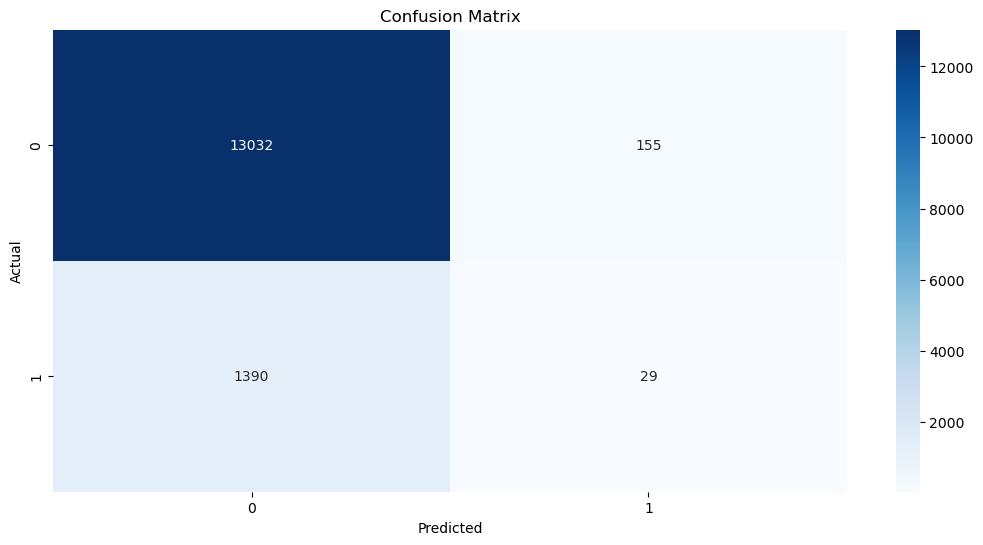

In [13]:
actual, predicted, proba = cross_val_predict(rr, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual, predicted)

The scores are very bad, to say the least. The matrix shows that the model is bad at predicting churn aka true positives. Let's introduce other features to the model.

In [14]:
feature_rich_data = pd.merge(left=client_data, right=feature_price.drop(columns=["churn"]), on="id", how="inner")
feature_rich_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,-0.008653,0.177779
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,-0.007395,0.236694
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,-0.006192,0.162916
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,-0.003767,0.177779


In [15]:
feature_rich_data = pd.merge(left=feature_rich_data, right=price_data, on="id", how="inner")
feature_rich_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.020057,3.700961,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.020057,3.700961,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.020057,3.700961,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.020057,3.700961,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.020057,3.700961,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0,-0.004628,-0.000001,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0,-0.004628,-0.000001,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0,-0.004628,-0.000001,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0,-0.004628,-0.000001,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


In [16]:
feature_rich_data = pd.merge(left=feature_rich_data, right=sensitivity_data, on="id", how="inner")
feature_rich_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,quarter_price_mid_peak_var,quarter_price_off_peak_fix,quarter_price_peak_fix,quarter_price_mid_peak_fix,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.071536,40.565971,24.339580,16.226387,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.071536,40.565973,24.339578,16.226383,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.073837,40.728885,24.437330,16.291555,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.049213,41.908233,16.291553,10.861037,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.071536,40.565971,24.339580,16.226387,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401075,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0.000000,44.266930,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000
1401076,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0.000000,44.266931,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000
1401077,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0.000000,44.266931,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000
1401078,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0.000000,44.266930,0.000000,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000


In [17]:
feature_rich_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401080 entries, 0 to 1401079
Data columns (total 53 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   id                               1401080 non-null  object        
 1   channel_sales                    1401080 non-null  object        
 2   cons_12m                         1401080 non-null  int64         
 3   cons_gas_12m                     1401080 non-null  int64         
 4   cons_last_month                  1401080 non-null  int64         
 5   date_activ                       1401080 non-null  object        
 6   date_end                         1401080 non-null  object        
 7   date_modif_prod                  1401080 non-null  object        
 8   date_renewal                     1401080 non-null  object        
 9   forecast_cons_12m                1401080 non-null  float64       
 10  forecast_cons_year            

Alright, before feeding the data to the model, we'll have to encode the objects, aka strings, and turn datetime values into years, months, days. We'll begin with the latter

In [18]:
feature_rich_data["date_activ"] = pd.to_datetime(feature_rich_data["date_activ"], format="%Y-%m-%d")
feature_rich_data["year_activ"] = feature_rich_data["date_activ"].dt.year
feature_rich_data["month_activ"] = feature_rich_data["date_activ"].dt.month
feature_rich_data["day_activ"] = feature_rich_data["date_activ"].dt.day
feature_rich_data = feature_rich_data.drop(columns=["date_activ"])
feature_rich_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,quarter_price_mid_peak_fix,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix,year_activ,month_activ,day_activ
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,16.226387,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,2013,6,15
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,16.226383,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,2013,6,15
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,16.291555,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,2013,6,15
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,10.861037,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,2013,6,15
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,16.226387,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,2013,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401075,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2016-12-17,2009-12-18,2015-12-21,762.41,0,...,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000,2009,12,18
1401076,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2016-12-17,2009-12-18,2015-12-21,762.41,0,...,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000,2009,12,18
1401077,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2016-12-17,2009-12-18,2015-12-21,762.41,0,...,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000,2009,12,18
1401078,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2016-12-17,2009-12-18,2015-12-21,762.41,0,...,0.000000,0.168662,0.087344,0.00000,44.266930,0.00000,0.00000,2009,12,18


In [19]:
feature_rich_data["date_end"] = pd.to_datetime(feature_rich_data["date_end"], format="%Y-%m-%d")
feature_rich_data["year_end"] = feature_rich_data["date_end"].dt.year
feature_rich_data["month_end"] = feature_rich_data["date_end"].dt.month
feature_rich_data["day_end"] = feature_rich_data["date_end"].dt.day
feature_rich_data = feature_rich_data.drop(columns=["date_end"])
feature_rich_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix,year_activ,month_activ,day_activ,year_end,month_end,day_end
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-11-01,2015-06-23,0.00,0,0.0,...,0.06653,40.942265,22.35201,14.90134,2013,6,15,2016,6,15
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-11-01,2015-06-23,0.00,0,0.0,...,0.06653,40.942265,22.35201,14.90134,2013,6,15,2016,6,15
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-11-01,2015-06-23,0.00,0,0.0,...,0.06653,40.942265,22.35201,14.90134,2013,6,15,2016,6,15
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-11-01,2015-06-23,0.00,0,0.0,...,0.06653,40.942265,22.35201,14.90134,2013,6,15,2016,6,15
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-11-01,2015-06-23,0.00,0,0.0,...,0.06653,40.942265,22.35201,14.90134,2013,6,15,2016,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401075,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2015-12-21,762.41,0,0.0,...,0.00000,44.266930,0.00000,0.00000,2009,12,18,2016,12,17
1401076,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2015-12-21,762.41,0,0.0,...,0.00000,44.266930,0.00000,0.00000,2009,12,18,2016,12,17
1401077,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2015-12-21,762.41,0,0.0,...,0.00000,44.266930,0.00000,0.00000,2009,12,18,2016,12,17
1401078,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2015-12-21,762.41,0,0.0,...,0.00000,44.266930,0.00000,0.00000,2009,12,18,2016,12,17


In [20]:
feature_rich_data["date_modif_prod"] = pd.to_datetime(feature_rich_data["date_modif_prod"], format="%Y-%m-%d")
feature_rich_data["year_modif_prod"] = feature_rich_data["date_modif_prod"].dt.year
feature_rich_data["month_modif_prod"] = feature_rich_data["date_modif_prod"].dt.month
feature_rich_data["day_modif_prod"] = feature_rich_data["date_modif_prod"].dt.day
feature_rich_data = feature_rich_data.drop(columns=["date_modif_prod"])
feature_rich_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,year_price_mid_peak_fix,year_activ,month_activ,day_activ,year_end,month_end,day_end,year_modif_prod,month_modif_prod,day_modif_prod
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-06-23,0.00,0,0.0,1.78,...,14.90134,2013,6,15,2016,6,15,2015,11,1
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-06-23,0.00,0,0.0,1.78,...,14.90134,2013,6,15,2016,6,15,2015,11,1
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-06-23,0.00,0,0.0,1.78,...,14.90134,2013,6,15,2016,6,15,2015,11,1
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-06-23,0.00,0,0.0,1.78,...,14.90134,2013,6,15,2016,6,15,2015,11,1
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2015-06-23,0.00,0,0.0,1.78,...,14.90134,2013,6,15,2016,6,15,2015,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401075,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2015-12-21,762.41,0,0.0,1.07,...,0.00000,2009,12,18,2016,12,17,2009,12,18
1401076,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2015-12-21,762.41,0,0.0,1.07,...,0.00000,2009,12,18,2016,12,17,2009,12,18
1401077,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2015-12-21,762.41,0,0.0,1.07,...,0.00000,2009,12,18,2016,12,17,2009,12,18
1401078,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2015-12-21,762.41,0,0.0,1.07,...,0.00000,2009,12,18,2016,12,17,2009,12,18


In [21]:
feature_rich_data["date_renewal"] = pd.to_datetime(feature_rich_data["date_renewal"], format="%Y-%m-%d")
feature_rich_data["year_renewal"] = feature_rich_data["date_renewal"].dt.year
feature_rich_data["month_renewal"] = feature_rich_data["date_renewal"].dt.month
feature_rich_data["day_renewal"] = feature_rich_data["date_renewal"].dt.day
feature_rich_data = feature_rich_data.drop(columns=["date_renewal"])
feature_rich_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,day_activ,year_end,month_end,day_end,year_modif_prod,month_modif_prod,day_modif_prod,year_renewal,month_renewal,day_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2016,6,15,2015,11,1,2015,6,23
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2016,6,15,2015,11,1,2015,6,23
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2016,6,15,2015,11,1,2015,6,23
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2016,6,15,2015,11,1,2015,6,23
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2016,6,15,2015,11,1,2015,6,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401075,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,18,2016,12,17,2009,12,18,2015,12,21
1401076,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,18,2016,12,17,2009,12,18,2015,12,21
1401077,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,18,2016,12,17,2009,12,18,2015,12,21
1401078,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,18,2016,12,17,2009,12,18,2015,12,21


In [22]:
feature_rich_data["year_price"] = feature_rich_data["price_date"].dt.year
feature_rich_data["month_price"] = feature_rich_data["price_date"].dt.month
feature_rich_data["day_price"] = feature_rich_data["price_date"].dt.day
feature_rich_data = feature_rich_data.drop(columns=["price_date"])
feature_rich_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,day_end,year_modif_prod,month_modif_prod,day_modif_prod,year_renewal,month_renewal,day_renewal,year_price,month_price,day_price
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2015,11,1,2015,6,23,2015,1,1
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2015,11,1,2015,6,23,2015,1,1
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2015,11,1,2015,6,23,2015,1,1
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2015,11,1,2015,6,23,2015,1,1
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,15,2015,11,1,2015,6,23,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401075,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,17,2009,12,18,2015,12,21,2015,12,1
1401076,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,17,2009,12,18,2015,12,21,2015,12,1
1401077,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,17,2009,12,18,2015,12,21,2015,12,1
1401078,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,17,2009,12,18,2015,12,21,2015,12,1


It's time to encode string categories

In [25]:
gas_dummies = pd.get_dummies(feature_rich_data["has_gas"], prefix="has_gas")
feature_rich_data = pd.concat([feature_rich_data, gas_dummies], axis=1)
feature_rich_data = feature_rich_data.drop(columns=["has_gas"])
feature_rich_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,year_renewal,month_renewal,day_renewal,year_price,month_price,day_price,has_gas_f,has_gas_t,has_gas_f,has_gas_t
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401075,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,2015,12,21,2015,12,1,1,0,1,0
1401076,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,2015,12,21,2015,12,1,1,0,1,0
1401077,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,2015,12,21,2015,12,1,1,0,1,0
1401078,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,762.41,0,0.0,1.07,0.167086,...,2015,12,21,2015,12,1,1,0,1,0


In [26]:
# intermediate data
feature_rich_data.to_csv("data/full_features_1.csv")

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
feature_rich_data = pd.read_csv("data/full_features_1.csv")
feature_rich_data = feature_rich_data.drop(columns=["Unnamed: 0"])
feature_rich_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,year_renewal,month_renewal,day_renewal,year_price,month_price,day_price,has_gas_f,has_gas_t,has_gas_f.1,has_gas_t.1
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,...,2015,6,23,2015,1,1,0,1,0,1


In [3]:
sales_codes = pd.get_dummies(feature_rich_data["channel_sales"], prefix="channel_sales")
feature_rich_data = pd.concat([feature_rich_data, sales_codes], axis=1)
feature_rich_data = feature_rich_data.drop(columns=["channel_sales"])
feature_rich_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,has_gas_f.1,has_gas_t.1,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,1,0,0,0,0,1,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,1,0,0,0,0,1,0,0,0
2,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,1,0,0,0,0,1,0,0,0
3,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,1,0,0,0,0,1,0,0,0
4,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,1,0,0,0,0,1,0,0,0


In [4]:
origin_codes = pd.get_dummies(feature_rich_data["origin_up"], prefix="origin_up")
feature_rich_data = pd.concat([feature_rich_data, origin_codes], axis=1)
feature_rich_data = feature_rich_data.drop(columns=["origin_up"])
feature_rich_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0
2,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0
3,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0
4,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0


Everything is ready. We'll save the the table into the csv table and load it before modeling

In [5]:
feature_rich_data.to_csv("data/feature_rich_data.csv")

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
feature_rich_data = pd.read_csv("data/feature_rich_data.csv")
feature_rich_data = feature_rich_data.drop(columns=["Unnamed: 0"])
feature_rich_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0
2,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0
3,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0
4,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0


In [3]:
y = feature_rich_data["churn"]
X = feature_rich_data.drop(columns=["id", "churn"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

rr = RandomForestClassifier()
scores = cross_validate(rr, X, y, scoring=("roc_auc", "f1"), return_train_score=True)
for score in scores:
    if score!="fit_time" and score!="score_time":
        print(f"{score}: {scores[score].mean()}")

test_roc_auc: 0.6945083924685137
train_roc_auc: 1.0
test_f1: 0.17685985739895968
train_f1: 1.0


In [4]:
import copy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def cross_val_predict(model, X, y, kfold = StratifiedKFold(n_splits=5, shuffle=True)):

    model_ = cp.deepcopy(model)
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)

    for train_ndx, test_ndx in kfold.split(X, y):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)
        no_classes = len(np.unique(y))

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))
        predicted_proba = np.empty([0, no_classes]) 

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

def plot_confusion_matrix(actual_classes, predicted_classes):

    matrix = confusion_matrix(y_true=actual_classes, y_pred=predicted_classes)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

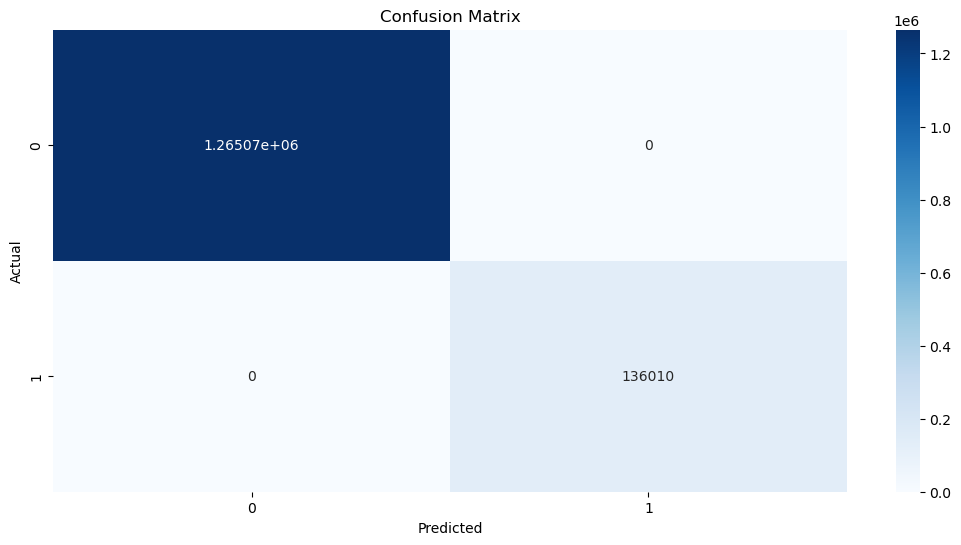

In [5]:
actual, predicted, proba = cross_val_predict(rr, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual, predicted)

Well, test f1 score improved from 2% to 17%. However, the result is still poor. Correlation matrix tells that the results are great, but it seems to be very misleading. I don't think, that further feature engineering will improve the model. Before wrapping up, let's add precision and recall metrics to identify the part of f1-score where the model struggles.

For your information:

- Precision - it measures the proportion of correctly predicted positive instances out of all instances predicted as positive
- Recall - it measures the proportion of correctly predicted positive instances out of all actual positive instances

In [6]:
rr = RandomForestClassifier()
scores = cross_validate(rr, X, y, scoring=("precision", "recall"), return_train_score=True)
for score in scores:
    if score!="fit_time" and score!="score_time":
        print(f"{score}: {scores[score].mean()}")

test_precision: 0.7765013939068176
train_precision: 1.0
test_recall: 0.10083082126314243
train_recall: 1.0


So the recall is teriible which means that the model cannot predict clients that churn like at all

### Summary
The perfomance of the model is terrible. It is able to predict loyal clients to a certain extent but completely useless for predicting churn. Some ways to improve that:
- using different model
- further feature engineering 
- more data on clients that churn because the imbalance of the dataset is mostly to blame for the poor results

That is the end of the project. It was a great experience :)